# Metadata

```
Name: Maureen O'Shea (mo2cr@virginia.edu)
Course: DS5001
Date: 06 May 2022

Title: Vectorization, TFIDF and BOW 

Description: Vectorize corpus with SciKit Learn and create TFIDF and BOW.   Register a BOW at OHCO level of ACTS with “English” stop words and proper nouns removed.  Register a VOCAB2 table of 4000 words.

Original Code Author:  R.C. Alvarado, Module 00 Final Projects, Using SciKit Learn to Vectorize your Corpus
```

# Set Up

In [1]:
data_home = "./data"
data_prefix = "folger"

In [2]:
OHCO = ['play_code', 'act_num', 'scene_num', 'speech_id', 'speaker','line_num']

In [3]:
ngram_range = (1,1)  
n_terms = 4000

In [4]:
import pandas as pd
import numpy as np
import plotly_express as px
import nltk

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

# Import CORPUS, LIB, VOCAB

In [6]:
CORPUS = pd.read_csv(f'{data_home}/{data_prefix}-CORPUS.csv', low_memory=False).set_index(OHCO[:6]).dropna()
VOCAB = pd.read_csv(f'{data_home}/{data_prefix}-VOCAB.csv', low_memory=False).set_index('term_str').dropna()
LIB = pd.read_csv(f'{data_home}/{data_prefix}-LIB2.csv', low_memory=False).set_index('play_code').dropna()
CORPUS = CORPUS.drop('lemma', 1) # Drop this column for readability

In [7]:
LIB.sort_values('year')

,play_title,year,source_file_path,genre,play_id,play_len,n_acts,n_scenes,n_speeches,label
play_code,,,,,,,,,,
Err,The Comedy of Errors,1589,https://www.folgerdigitaltexts.org/Err,comedy,3,12097,5,11,495,1589 (c): The Comedy of Errors
3H6,"Henry VI, Part 3",1590,https://www.folgerdigitaltexts.org/3H6,history,12,16091,5,28,651,"1590 (h): Henry VI, Part 3"
2H6,"Henry VI, Part 2",1590,https://www.folgerdigitaltexts.org/2H6,history,11,10098,5,25,321,"1590 (h): Henry VI, Part 2"
1H6,"Henry VI, Part 1",1591,https://www.folgerdigitaltexts.org/1H6,history,10,36113,5,30,1022,"1591 (h): Henry VI, Part 1"
R3,Richard III,1592,https://www.folgerdigitaltexts.org/R3,history,27,23772,5,30,915,1592 (h): Richard III
Shr,The Taming of the Shrew,1593,https://www.folgerdigitaltexts.org/Shr,comedy,29,16484,6,14,643,1593 (c): The Taming of the Shrew
Tit,Titus Andronicus,1593,https://www.folgerdigitaltexts.org/Tit,tragedy,32,19411,5,14,548,1593 (t): Titus Andronicus
TGV,Two Gentlemen of Verona,1594,https://www.folgerdigitaltexts.org/TGV,comedy,35,12445,5,18,537,1594 (c): Two Gentlemen of Verona
LLL,Love's Labor's Lost,1594,https://www.folgerdigitaltexts.org/LLL,comedy,17,9897,5,7,485,1594 (c): Love's Labor's Lost


In [8]:
CORPUS

token_str     pos  \
play_code act_num scene_num speech_id speaker    line_num                     
1H4       1       1         1         henryiv    1               So      av   
                                                 1           shaken     vvn   
                                                 1               as  acp-cs   
                                                 1               we     pns   
                                                 1              are     vvb   
...                                                             ...     ...   
Wiv       5       5         2908      masterford 254          shall     vmb   
                                                 254            lie     vvi   
                                                 254           with   acp-p   
                                                 254       Mistress      n1   
                                                 254           Ford   n1-nn   

                                                           term_str  
play_code act_num scene_num speech_id speaker    line_num            
1H4       1       1         1         henryiv    1               so  
                                                 1           shaken  
                                                 1               as  
                                                 1               we  
                                                 1              are  
...                                                             ...  
Wiv       5       5         2908      masterford 254          shall  
                                                 254            lie  
                                                 254           with  
                                                 254       mistress  
                                                 254           ford  

[593339 rows x 3 columns]

# Create DOC

In [9]:
def gather_docs(CORPUS, ohco_level, term_col='term_str'):
    OHCO = CORPUS.index.names
    CORPUS[term_col] = CORPUS[term_col].astype('str')
    DOC = CORPUS.groupby(OHCO[:ohco_level])[term_col].apply(lambda x:' '.join(x)).to_frame('doc_str')
    return DOC

In [10]:
DOC = gather_docs(CORPUS, 2) 

In [11]:
DOC['n_tokens'] = DOC.doc_str.apply(lambda x: len(x.split()))

In [12]:
DOC

doc_str  n_tokens
play_code act_num                                                             
1H4       1        so shaken as we are so wan with care find we a...      3066
          2        comes the king back from wales my noble lord h...      2023
          3        bring forth these men bushy and green i will n...      3520
          4        call forth bagot now bagot freely speak thy mi...      4823
          5        how bloodily the sun begins to peer above yon ...      2782
...                                                              ...       ...
WT        5        sir you have done enough and have performed a ...      3184
Wiv       2        love like a shadow flies when substance love p...        17
          3        to shallow rivers to whose falls melodious bir...       469
          4        well leave a proof by that which we will do wi...      1027
          5        against such lewdsters and their lechery those...       409

[185 rows x 2 columns]

## Remove Stop words ('english' stop words and proper nouns)

We use NLTK's built in stopword list for English. Note that we can add and subtract from this list, or just create our own list and keep it in our data model.

In [13]:
# nltk stop words
stopwords = nltk.corpus.stopwords.words('english')

In [14]:
#stopwords

In [15]:
len(stopwords)

179

When creating a bag of words at the Act OCHO level and creating topic models, the topics were filled with character names.  At first, I thought to remove the character names from the BOW.  After reviewing the list of character names, i saw that many of the character names were not proper nouns, but nouns such as lord, nurse, priest, maid.  I did not want to remove these such terms from the bag.  Instead of removing character names, I chose to remove proper nouns from the BOW by adding proper nouns to the list of stopwords.  Three addition words with very low tfidf values are added to the stopwords as well. 

In [16]:
properNouns = VOCAB[VOCAB.max_pos.isin(["n1-nn", "n1g-nn"])].index.tolist()

In [17]:
#properNouns

In [18]:
len(properNouns)

1520

In [19]:
addedStop= ['thou','thee','shall']

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
#stopwords.extend(properNouns)
stopwords.extend(properNouns+addedStop)
# Reference: https://stackoverflow.com/questions/5511708/adding-words-to-nltk-stoplist

In [21]:
len(stopwords)

1702

# CountVectorizer + TfidfTransformer

## Create DTM

In [22]:
count_engine = CountVectorizer(
    stop_words=stopwords,
    ngram_range=ngram_range,
    max_features=n_terms)

In [23]:
CountVectorizer

sklearn.feature_extraction.text.CountVectorizer

In [24]:
X = count_engine.fit_transform(DOC.doc_str)

In [25]:
#X.toarray()

In [26]:
#count_engine.get_feature_names()

In [27]:
DTM = pd.DataFrame(X.toarray(), 
                   columns=count_engine.get_feature_names(), 
                   index=DOC.index)

In [28]:
DTM

abbey  abhor  abhorred  abide  abject  able  aboard  \
play_code act_num                                                        
1H4       1            0      0         0      0       0     0       0   
          2            0      0         0      1       0     0       0   
          3            0      0         0      0       0     0       0   
          4            0      0         0      0       1     0       0   
          5            0      0         0      0       0     0       0   
...                  ...    ...       ...    ...     ...   ...     ...   
WT        5            0      0         0      0       0     0       0   
Wiv       2            0      0         0      0       0     0       0   
          3            0      0         0      0       0     0       0   
          4            0      0         0      0       0     0       0   
          5            0      0         0      0       0     0       0   

                   abroad  absence  absent  ...  youd  youll  young  younger  \
play_code act_num                           ...                                
1H4       1             0        0       1  ...     0      0      6        0   
          2             0        0       0  ...     0      0      1        0   
          3             0        0       0  ...     0      0      1        1   
          4             0        3       0  ...     0      0      2        0   
          5             0        0       1  ...     0      0      1        1   
...                   ...      ...     ...  ...   ...    ...    ...      ...   
WT        5             0        0       0  ...     0      2      3        0   
Wiv       2             0        0       0  ...     0      0      0        0   
          3             0        0       0  ...     0      0      0        0   
          4             0        0       0  ...     0      2      0        0   
          5             0        0       0  ...     0      0      0        0   

                   youngest  youre  youth  youthful  zeal  zounds  
play_code act_num                                                  
1H4       1               0      0      1         1     0       0  
          2               0      0      2         0     0       0  
          3               0      0      1         0     0       0  
          4               0      0      4         2     0       0  
          5               0      0      2         0     0       0  
...                     ...    ...    ...       ...   ...     ...  
WT        5               0      0      1         0     1       0  
Wiv       2               0      0      0         0     0       0  
          3               0      0      0         0     0       0  
          4               0      0      0         0     0       0  
          5               0      0      0         0     0       0  

[185 rows x 4000 columns]

## Get VOCAB

In [29]:
VOCAB = DTM.sum().to_frame('n').rename_axis('term_str')

In [30]:
VOCAB.sort_index()

,n
term_str,
abbey,14
abhor,13
abhorred,11
abide,23
abject,11
...,...
youre,54
youth,188
youthful,26


In [31]:
VOCAB['n_chars'] = VOCAB.apply(lambda x: len(x.name), 1)
VOCAB['n_tokens'] = VOCAB.apply(lambda x: len(x.name.split()), 1)

In [32]:
VOCAB.value_counts('n_tokens')

n_tokens
1    4000
dtype: int64

## Create TFIDF

In [33]:
tfidf_engine = TfidfTransformer(norm='l2', use_idf=True)

In [34]:
X1 = tfidf_engine.fit_transform(DTM)

In [35]:
TFIDF = pd.DataFrame(X1.toarray(), columns=DTM.columns, index=DTM.index)

In [36]:
TFIDF

abbey  abhor  abhorred     abide    abject  able  aboard  \
play_code act_num                                                             
1H4       1          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
          2          0.0    0.0       0.0  0.036287  0.000000   0.0     0.0   
          3          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
          4          0.0    0.0       0.0  0.000000  0.024708   0.0     0.0   
          5          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
...                  ...    ...       ...       ...       ...   ...     ...   
WT        5          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
Wiv       2          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
          3          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
          4          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   
          5          0.0    0.0       0.0  0.000000  0.000000   0.0     0.0   

                   abroad   absence    absent  ...  youd     youll     young  \
play_code act_num                              ...                             
1H4       1           0.0  0.000000  0.029245  ...   0.0  0.000000  0.079127   
          2           0.0  0.000000  0.000000  ...   0.0  0.000000  0.016599   
          3           0.0  0.000000  0.000000  ...   0.0  0.000000  0.011351   
          4           0.0  0.050454  0.000000  ...   0.0  0.000000  0.017805   
          5           0.0  0.000000  0.028435  ...   0.0  0.000000  0.012822   
...                   ...       ...       ...  ...   ...       ...       ...   
WT        5           0.0  0.000000  0.000000  ...   0.0  0.036218  0.036593   
Wiv       2           0.0  0.000000  0.000000  ...   0.0  0.000000  0.000000   
          3           0.0  0.000000  0.000000  ...   0.0  0.000000  0.000000   
          4           0.0  0.000000  0.000000  ...   0.0  0.065006  0.000000   
          5           0.0  0.000000  0.000000  ...   0.0  0.000000  0.000000   

                    younger  youngest  youre     youth  youthful      zeal  \
play_code act_num                                                            
1H4       1        0.000000       0.0    0.0  0.015796  0.028830  0.000000   
          2        0.000000       0.0    0.0  0.039764  0.000000  0.000000   
          3        0.024816       0.0    0.0  0.013597  0.000000  0.000000   
          4        0.000000       0.0    0.0  0.042654  0.038925  0.000000   
          5        0.028031       0.0    0.0  0.030717  0.000000  0.000000   
...                     ...       ...    ...       ...       ...       ...   
WT        5        0.000000       0.0    0.0  0.014610  0.000000  0.026666   
Wiv       2        0.000000       0.0    0.0  0.000000  0.000000  0.000000   
          3        0.000000       0.0    0.0  0.000000  0.000000  0.000000   
          4        0.000000       0.0    0.0  0.000000  0.000000  0.000000   
          5        0.000000       0.0    0.0  0.000000  0.000000  0.000000   

                   zounds  
play_code act_num          
1H4       1           0.0  
          2           0.0  
          3           0.0  
          4           0.0  
          5           0.0  
...                   ...  
WT        5           0.0  
Wiv       2           0.0  
          3           0.0  
          4           0.0  
          5           0.0  

[185 rows x 4000 columns]

In [39]:
TFIDF[VOCAB.sort_values('n', ascending=False).head(200).sample(10).index].sample(10).fillna(0).style.background_gradient(cmap='GnBu', high=.75)

,,life,far,arms,wife,faith,better,makes,comes,much,first
play_code,act_num,,,,,,,,,,
Ado,5,0.000000,0.000000,0.000000,0.015600,0.034367,0.000000,0.000000,0.048461,0.023202,0.026747
3H6,4,0.039588,0.028875,0.022355,0.030253,0.022216,0.024952,0.056119,0.023496,0.022499,0.000000
TGV,3,0.055465,0.026971,0.000000,0.028257,0.000000,0.011653,0.026209,0.010973,0.073551,0.012112
Cor,2,0.008156,0.000000,0.000000,0.010387,0.011442,0.034269,0.000000,0.008067,0.000000,0.008905
R3,5,0.035920,0.017467,0.050710,0.027450,0.020158,0.007547,0.016973,0.014212,0.034023,0.015689
Mac,5,0.048082,0.000000,0.016970,0.015310,0.000000,0.025254,0.014200,0.023781,0.034157,0.052501
AYL,1,0.017864,0.021717,0.000000,0.000000,0.000000,0.075063,0.000000,0.000000,0.050762,0.000000
R3,4,0.042121,0.008534,0.059464,0.053648,0.019698,0.014749,0.024879,0.027777,0.013299,0.007665
H8,2,0.051861,0.055165,0.009152,0.041283,0.027285,0.020429,0.007658,0.019237,0.061403,0.056627


## Add stats to VOCAB

In [40]:
VOCAB['tfidf_mean'] = TFIDF.mean()
VOCAB['df'] = DTM[DTM > 0].count()
VOCAB['dfidf'] = VOCAB.df * np.log2(len(TFIDF)/VOCAB.df)

In [41]:
VOCAB.sort_values('dfidf', ascending=False).head(10)

,n,n_chars,n_tokens,tfidf_mean,df,dfidf
term_str,,,,,,
beauty,118,6,1,0.010657,68,98.186466
tomorrow,160,8,1,0.014241,68,98.186466
entreat,98,7,1,0.008315,68,98.186466
highness,177,8,1,0.014659,68,98.186466
ho,139,2,1,0.011817,68,98.186466
note,107,4,1,0.010569,68,98.186466
favor,102,5,1,0.008901,68,98.186466
strength,105,8,1,0.008367,69,98.177133
office,96,6,1,0.008524,69,98.177133


## Get Max POS
Get the most frequently associated part-of-space category for each word.

In [42]:
VOCAB['max_pos'] = CORPUS[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)

## Compute POS ambiguity

How many POS categories are associated with each word?

In [43]:
VOCAB['n_pos'] = CORPUS[['term_str','pos']].value_counts().unstack().count(1)

In [44]:
VOCAB['cat_pos'] = CORPUS[['term_str','pos']].value_counts().to_frame('n').reset_index()\
    .groupby('term_str').pos.apply(lambda x: set(x))

In [45]:
VOCAB.sort_index()

,n,n_chars,n_tokens,tfidf_mean,df,dfidf,max_pos,n_pos,cat_pos
term_str,,,,,,,,,
abbey,14,5,1,0.002708,5,26.047267,n1,1,{n1}
abhor,13,5,1,0.001972,12,47.357028,vvb,2,"{vvi, vvb}"
abhorred,11,8,1,0.001550,11,44.791448,j_vn,3,"{vvz, vvn, j_vn}"
abide,23,5,1,0.002877,22,67.582897,vvi,2,"{vvb, vvi}"
abject,11,6,1,0.001846,9,39.253108,j,1,{j}
...,...,...,...,...,...,...,...,...,...
youre,54,5,1,0.006025,34,83.093233,pn|vvb,1,{pn|vvb}
youth,188,5,1,0.014934,92,92.719394,n1,1,{n1}
youthful,26,8,1,0.003262,22,67.582897,j,1,{j}


# Zipf's Law

First, we explore Zipf's Law, which may be expressed by $f \propto \frac{1}{r}$ and the constant $k =  fr$.

Essentially, it says the frequency of tokens in a language is logarithmic. It is a property of all known human languages. 

Specifically, it says the tokens can be ranked $r = 1,2,3,4, \dots ,N$ where (1) the rank is inversely proportional to the frequency, i.e. the lower the rank number, the higher the frequency, and (2) the frequency of a rank $r$ word is $1/r$ times that the most frequent word $r = 1$. So, the rank 2 word occurs half as often as the rank 1 word, the rank 3 word one-third as often, the rank 4 word one-fourth as often, and so forth. The law breaks down at around $r = 1000$.

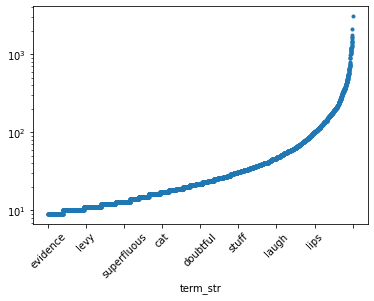

In [46]:
VOCAB.n.sort_values().plot(logy=True, style='.', rot=45);

## Add Term Rank $r$ to `VOCAB`

In [47]:
if 'term_rank' not in VOCAB.columns:
    VOCAB = VOCAB.sort_values('n', ascending=False).reset_index()
    VOCAB.index.name = 'term_rank'
    VOCAB = VOCAB.reset_index()
    VOCAB['term_rank'] = VOCAB['term_rank'] + 1
    VOCAB = VOCAB.set_index('term_str')

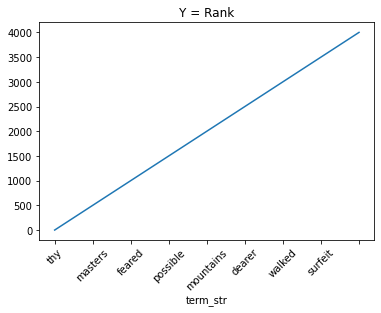

In [48]:
VOCAB.term_rank.plot(logx=False, rot=45, title="Y = Rank");

In [49]:
new_rank = VOCAB.n.value_counts()\
    .sort_index(ascending=False).reset_index().reset_index()\
    .rename(columns={'level_0':'term_rank2', 'index':'n', 'n':'nn'})\
    .set_index('n')

In [50]:
VOCAB['term_rank2'] = VOCAB.n.map(new_rank.term_rank2) + 1

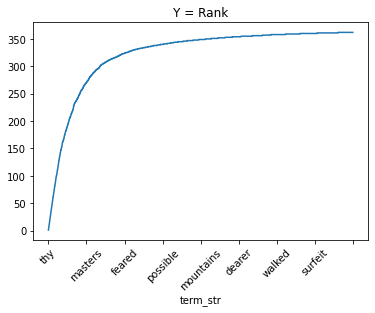

In [51]:
VOCAB.term_rank2.plot(logx=False, rot=45, title="Y = Rank");

In [52]:
VOCAB

,term_rank,n,n_chars,n_tokens,tfidf_mean,df,dfidf,max_pos,n_pos,cat_pos,term_rank2
term_str,,,,,,,,,,,
thy,1,3074,3,1,0.131988,175,14.029811,po,2,"{n1, po}",1
lord,2,2091,4,1,0.092476,175,14.029811,n1,3,"{n1, n1g, n2}",2
good,3,1786,4,1,0.077583,182,4.292801,j,1,{j},3
come,4,1685,4,1,0.074410,181,5.707939,vvb,3,"{vvi, vvb, vvn}",4
well,5,1650,4,1,0.073146,181,5.707939,av,5,"{uh_mi, av, n1, pns|vmb, av_j}",5
...,...,...,...,...,...,...,...,...,...,...,...
burièd,3996,9,6,1,0.001425,8,36.251052,vvn,1,{vvn},362
bull,3997,9,4,1,0.001582,7,33.068186,n1,2,"{n1-nn, n1}",362
western,3998,9,7,1,0.001872,8,36.251052,j,1,{j},362


In [53]:
px.scatter(VOCAB.reset_index(), x='term_rank', y='dfidf', color='max_pos', hover_name='term_str', height=500)

/Users/maureenoshea/opt/anaconda3/lib/python3.7/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



# Create BOW

In [54]:
BOW = DTM[DTM > 0].stack().to_frame('n').join(TFIDF[TFIDF > 0].stack().to_frame('tfidf'))
BOW = BOW.rename_axis(index=('play_code','act_num','term_str'))

In [55]:
BOW.dropna()

n     tfidf
play_code act_num term_str                   
1H4       1       absent        1.0  0.029245
                  accursed      1.0  0.032818
                  acquaintance  1.0  0.031117
                  add           1.0  0.024651
                  adieu         1.0  0.021586
...                             ...       ...
Wiv       5       wives         2.0  0.150505
                  wood          1.0  0.083096
                  word          1.0  0.036410
                  would         2.0  0.056622
                  yet           1.0  0.028311

[123739 rows x 2 columns]

# Play

In [56]:
DOC['n_tokens_used'] = BOW.groupby(OHCO[:2]).n.sum().astype('int')
DOC['token_use_rate'] = DOC.n_tokens_used / DOC.n_tokens

In [57]:
DOC

doc_str  \
play_code act_num                                                      
1H4       1        so shaken as we are so wan with care find we a...   
          2        comes the king back from wales my noble lord h...   
          3        bring forth these men bushy and green i will n...   
          4        call forth bagot now bagot freely speak thy mi...   
          5        how bloodily the sun begins to peer above yon ...   
...                                                              ...   
WT        5        sir you have done enough and have performed a ...   
Wiv       2        love like a shadow flies when substance love p...   
          3        to shallow rivers to whose falls melodious bir...   
          4        well leave a proof by that which we will do wi...   
          5        against such lewdsters and their lechery those...   

                   n_tokens  n_tokens_used  token_use_rate  
play_code act_num                                           
1H4       1            3066           1213        0.395629  
          2            2023            823        0.406822  
          3            3520           1442        0.409659  
          4            4823           2021        0.419034  
          5            2782           1160        0.416966  
...                     ...            ...             ...  
WT        5            3184           1325        0.416143  
Wiv       2              17              8        0.470588  
          3             469            201        0.428571  
          4            1027            423        0.411879  
          5             409            184        0.449878  

[185 rows x 4 columns]

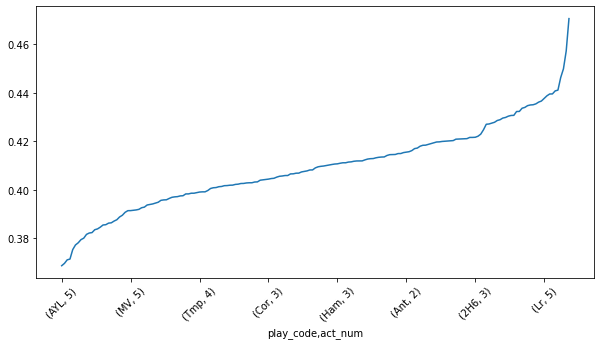

In [58]:
DOC.sort_values('token_use_rate').token_use_rate.plot(rot=45, figsize=(10,5));

In [59]:
LIB['token_use_rate_mean'] = DOC.groupby('play_code').token_use_rate.mean()
LIB['n_tokens'] = DOC.groupby('play_code').n_tokens.sum()

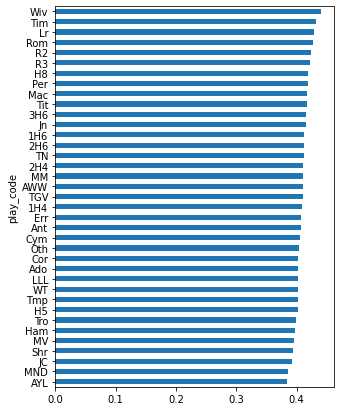

In [60]:
LIB.sort_values('token_use_rate_mean').token_use_rate_mean.plot.barh(figsize=(5,7));

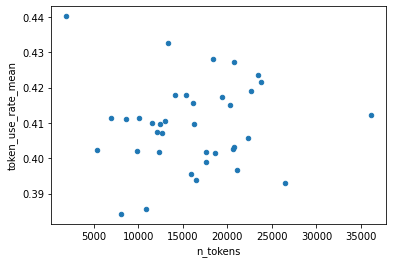

In [61]:
LIB.plot.scatter('n_tokens', 'token_use_rate_mean', logx=False);

# Save

In [62]:
BOW.to_csv(f'{data_home}/folger-BOW.csv')
VOCAB.to_csv(f'{data_home}/folger-VOCAB2.csv')
CORPUS.to_csv(f'{data_home}/folger-CORPUS2.csv')